<a href="https://colab.research.google.com/github/NityaVerma19/Customer-Purchase-Decision-/blob/master/Consumer_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import omni_normtest
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("/content/consumer behaviour.csv")

In [ ]:
df.head()

,age,income,gender,price,product,green_pack,purchase
0,30,45000,0,1200,Beverage,1,0
1,45,80000,1,3500,Clothing,0,1
2,55,110000,0,2500,Beauty,1,1
3,40,60000,1,700,Food,0,1
4,25,30000,0,800,Personal hygiene,1,0


In [ ]:
df.shape

(330, 7)

In [ ]:
df['product'].unique()

array(['Beverage', 'Clothing', 'Beauty', 'Food', 'Personal hygiene',
       'Paper products'], dtype=object)

In [ ]:
df.describe()

,age,income,gender,price,green_pack,purchase
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,40.187879,79093.939394,0.500000,2305.557576,0.545455,0.660606
std,10.561493,31987.012366,0.500759,1251.296769,0.498686,0.474223
min,20.000000,25000.000000,0.000000,300.000000,0.000000,0.000000
25%,31.000000,52250.000000,0.000000,1200.000000,0.000000,0.000000
50%,40.000000,78000.000000,0.500000,2050.000000,1.000000,1.000000
75%,49.000000,98000.000000,1.000000,3206.750000,1.000000,1.000000
max,60.000000,160000.000000,1.000000,4932.000000,1.000000,1.000000


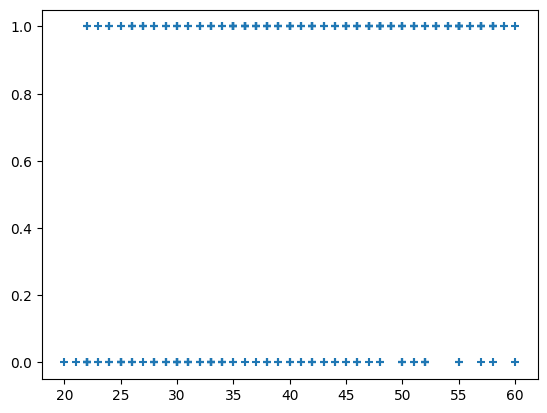

In [ ]:
plt.scatter(df.age, df.purchase, marker = "+")

In [ ]:
#correlation between numerical variables
df.corr()

<ipython-input-186-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,income,gender,price,green_pack,purchase
age,1.000000,0.873998,-0.069540,0.686868,-0.172448,0.334412
income,0.873998,1.000000,-0.033303,0.813425,-0.139940,0.409274
gender,-0.069540,-0.033303,1.000000,-0.043740,-0.158231,-0.063997
price,0.686868,0.813425,-0.043740,1.000000,-0.209459,0.345248
green_pack,-0.172448,-0.139940,-0.158231,-0.209459,1.000000,-0.063095
purchase,0.334412,0.409274,-0.063997,0.345248,-0.063095,1.000000


### *Age and Income have positive high correlation*
### *Green packaging and purchase decision have negative correlation*


In [23]:
prod_green = df.groupby('product')['green_pack'].count()
prod_green_df = prod_green.reset_index()
prod_green_df

,product,green_pack
0,Beauty,60
1,Beverage,49
2,Clothing,62
3,Food,81
4,Paper products,12
5,Personal hygiene,66


In [27]:
theme = sns.color_palette('mako')
sns.barplot()

<Axes: xlabel='product', ylabel='green_pack'>

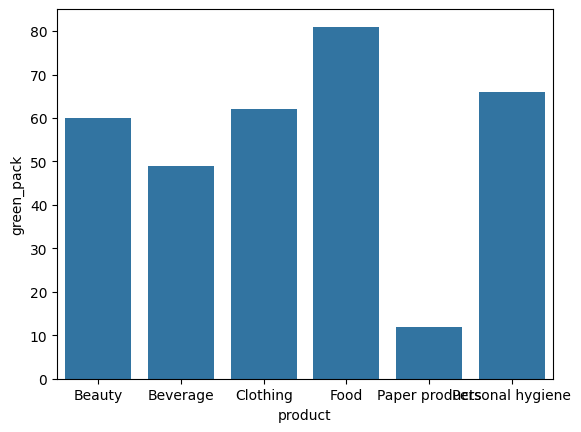

In [30]:
sns.barplot(prod_green_df, x = prod_green_df['product'], y ='green_pack')


---





# Logistic Regression


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#feature variable

X_scaled = df.drop(columns = ['purchase', 'product'], axis= 1)


#target variable

y = df.purchase.values



In [ ]:
X.head()

,age,income,gender,price,green_pack
0,30,45000,0,1200,1
1,45,80000,1,3500,0
2,55,110000,0,2500,1
3,40,60000,1,700,0
4,25,30000,0,800,1


In [ ]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((264, 5), (66, 5))

*264 rows in training dataset*
*66 rows in testiing dataset*

*Feature engineering*

In [ ]:
# display categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['product']

In [ ]:
#display numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['age', 'income', 'gender', 'price', 'green_pack', 'purchase']

In [ ]:
X_train.describe()

,age,income,gender,price,green_pack
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,40.185606,79375.000000,0.477273,2336.776515,0.553030
std,10.774901,32368.739026,0.500432,1249.521901,0.498124
min,20.000000,25000.000000,0.000000,400.000000,0.000000
25%,31.000000,52000.000000,0.000000,1200.000000,0.000000
50%,40.000000,78000.000000,0.000000,2179.000000,1.000000
75%,50.000000,98000.000000,1.000000,3276.750000,1.000000
max,60.000000,160000.000000,1.000000,4892.000000,1.000000


In [ ]:
cols = X_train.columns
cols                #everything except purchase

Index(['age', 'income', 'gender', 'price', 'green_pack'], dtype='object')

In [ ]:
pip install category_encoders

*Endoding categorical variable*

#import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['product'])        #The BinaryEncoder is a type of categorical encoding technique that represents each category as a binary number

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()

X_train = pd.concat([X_train[numerical], X_train[['product_0', 'product_1', 'product_2']]], axis=1)

X_train.head()


X_test = pd.concat([X_test[numerical], X_test[['product_0', 'product_1', 'product_2']]], axis=1)

X_test.head()


*Feature Scaling*

cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

*Model Training*

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression (random_state=1)


# fit the model
result = logreg.fit(X_train, y_train)

In [ ]:
result

LogisticRegression(random_state=1)

*Predict Results*

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
# probability of getting output as 0 - no purchase

logreg.predict_proba(X_test)[:,0]

array([0.04009793, 0.64448688, 0.17331154, 0.45434336, 0.42739464,
       0.65044312, 0.01913649, 0.38425889, 0.63215069, 0.57308182,
       0.09732845, 0.5370271 , 0.641752  , 0.0870154 , 0.46491747,
       0.46344428, 0.61228483, 0.30170434, 0.35476934, 0.155748  ,
       0.23523404, 0.1467364 , 0.53479123, 0.05051873, 0.11342575,
       0.02051069, 0.27346435, 0.30190325, 0.18048492, 0.12392155,
       0.06558997, 0.20194197, 0.44539245, 0.64532016, 0.19035562,
       0.07217926, 0.28434299, 0.09399956, 0.69454555, 0.27086246,
       0.02478797, 0.44174433, 0.28681416, 0.0910544 , 0.27748828,
       0.25144302, 0.43258544, 0.62321001, 0.28733667, 0.28983445,
       0.66422765, 0.24884941, 0.44896929, 0.46476785, 0.41572033,
       0.54789025, 0.131995  , 0.19091705, 0.31331937, 0.11562834,
       0.21495008, 0.19734344, 0.61654271, 0.64018869, 0.41809864,
       0.09849532])

In [ ]:
# probability of getting output as 1 - purchase

probs = logreg.predict_proba(X_test)[:,1]
probs

array([0.95990207, 0.35551312, 0.82668846, 0.54565664, 0.57260536,
       0.34955688, 0.98086351, 0.61574111, 0.36784931, 0.42691818,
       0.90267155, 0.4629729 , 0.358248  , 0.9129846 , 0.53508253,
       0.53655572, 0.38771517, 0.69829566, 0.64523066, 0.844252  ,
       0.76476596, 0.8532636 , 0.46520877, 0.94948127, 0.88657425,
       0.97948931, 0.72653565, 0.69809675, 0.81951508, 0.87607845,
       0.93441003, 0.79805803, 0.55460755, 0.35467984, 0.80964438,
       0.92782074, 0.71565701, 0.90600044, 0.30545445, 0.72913754,
       0.97521203, 0.55825567, 0.71318584, 0.9089456 , 0.72251172,
       0.74855698, 0.56741456, 0.37678999, 0.71266333, 0.71016555,
       0.33577235, 0.75115059, 0.55103071, 0.53523215, 0.58427967,
       0.45210975, 0.868005  , 0.80908295, 0.68668063, 0.88437166,
       0.78504992, 0.80265656, 0.38345729, 0.35981131, 0.58190136,
       0.90150468])

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
# Display summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.514344
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  264
Model:                          Logit   Df Residuals:                      259
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.1885
Time:                        14:11:47   Log-Likelihood:                -135.79
converged:                       True   LL-Null:                       -167.34
Covariance Type:            nonrobust   LLR p-value:                 6.456e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0899      0.024     -3.732      0.000      -0.137      -0.043
income      6.592e-05   1.52e

In [ ]:
confusion_matrix(y_test, y_pred_test, labels = ['0','1'])

array([[0, 0],
       [0, 0]])

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Confusion Matrix:
[[ 9 16]
 [ 6 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        25
           1       0.69      0.85      0.76        41

    accuracy                           0.67        66
   macro avg       0.64      0.61      0.61        66
weighted avg       0.65      0.67      0.64        66



ValueError: not enough values to unpack (expected 4, got 2)

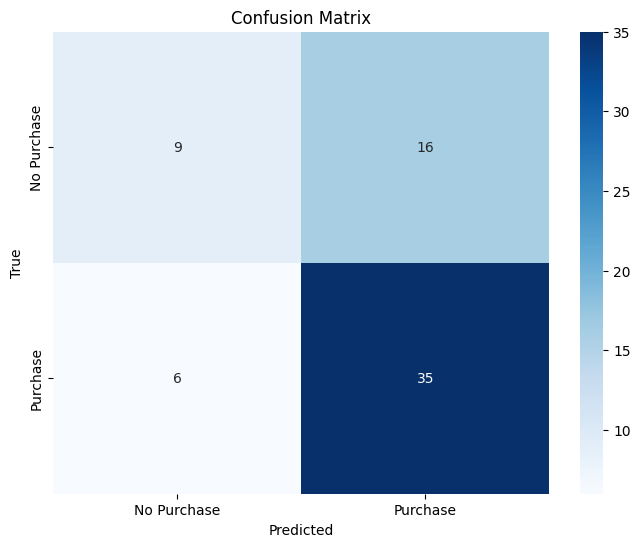

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_test are your true labels and predicted labels respectively
# Define the labels
labels = ["No Purchase", "Purchase"]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Checking Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6667


In [ ]:
logreg.score(X_test,y_test)


0.6666666666666666

In [ ]:
gfg = omni_normtest(X_test)
gfg

NormaltestResult(statistic=array([  10.99182224,    6.69218446, 1086.62249852,    7.9138266 ,
        788.79576077]), pvalue=array([4.10351597e-003, 3.52217239e-002, 1.10388159e-236, 1.91220473e-002,
       5.19011373e-172]))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6429268292682927

Weak discrimination

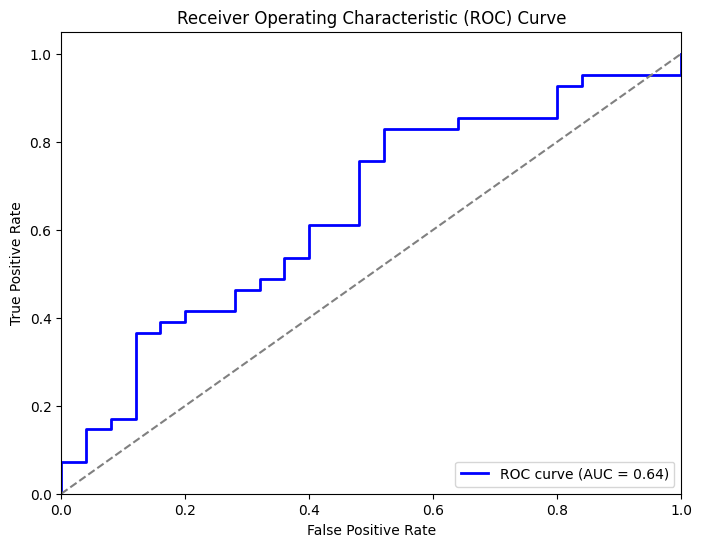

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
44/66

0.6666666666666666

In [ ]:
X_test

,age,income,gender,price,green_pack
122,52,130000,1,4500,0
66,28,35000,0,1000,0
142,58,115000,1,4200,0
246,30,50000,0,1500,1
146,36,61000,1,1200,1
...,...,...,...,...,...
235,45,92000,0,2900,0
74,30,40000,1,800,1
52,31,40000,0,900,1
236,35,60000,0,1400,1
